In [12]:
# This notebook plots a lot plots
# Last Update: 11/26/2021

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


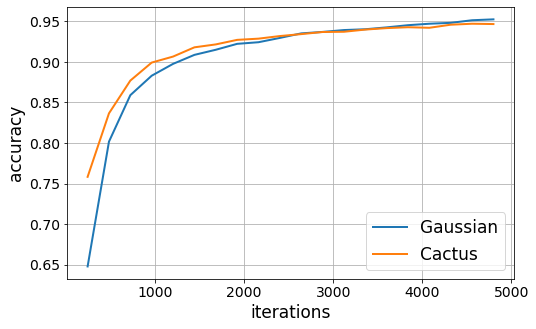

In [2]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

sen=1.0
epochs=20
x=np.array(list(range(1,epochs+1)))
variance=0.1

plt.figure(figsize=(8, 5))
filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,0,sen,variance))
curve = pd.read_csv(filename)
plt.plot(x*240,curve['val_accuracy'],label=('Gaussian'),linewidth=2)
filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,2,sen,variance))
curve = pd.read_csv(filename)
plt.plot(x*240,curve['val_accuracy'],label=('Cactus'),linewidth=2)

         
# plt.title('test accuracy, l2_norm_limit=%1.1f' %(sen[sen_type]))
plt.xlabel('iterations',fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('accuracy',fontsize=17)
plt.yticks(fontsize=14)
# plt.gca().set_ylim([0.7, 0.98])
plt.legend(loc='lower right',fontsize=17)
plt.grid(True)
plt.savefig('/home/fwei16/privacy_plots/MNIST_GaussianCactus_L2_0.1.eps', format='eps')

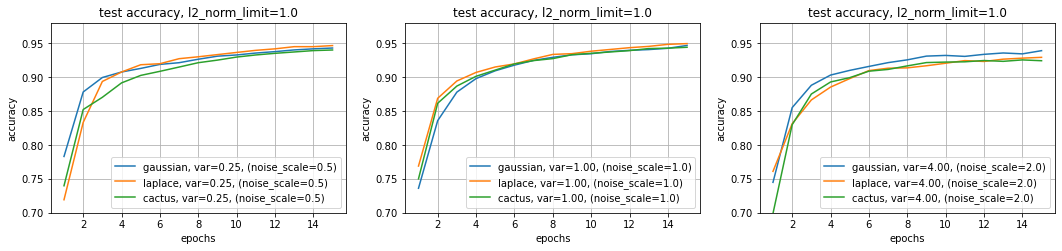

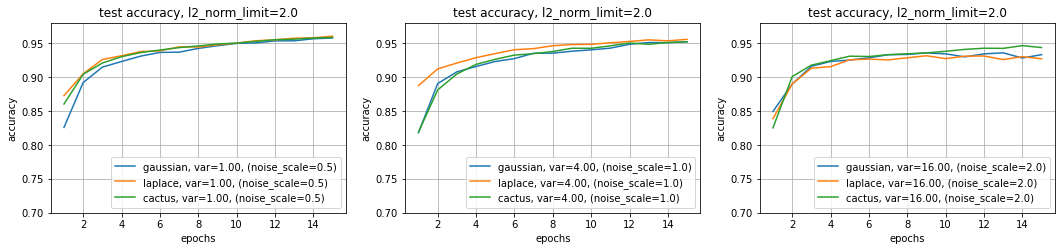

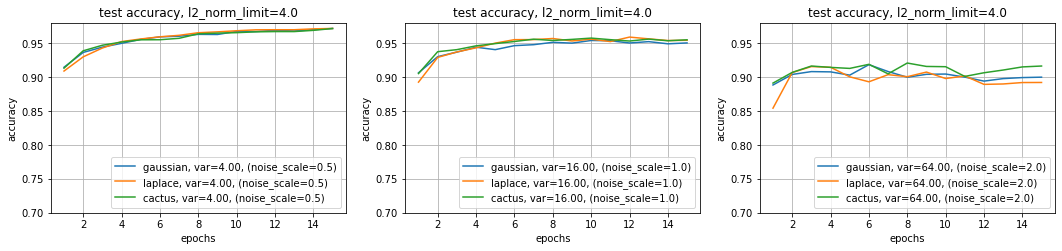

In [4]:
# summarize history for accuracy

import matplotlib.pyplot as plt
import csv
import pandas as pd

sen=1.0
epochs=15
x=range(1,epochs+1)

noise_multiplier=[0.5, 1.0, 2.0]
sen=[1.0,2.0,4.0]
dpsgd=['gaussian', 'laplace','cactus']
for sen_type in [0,1,2]:    
    plt.figure(figsize=(18, 3.5))
    for noise_type in [0,1,2]:     
        plt.subplot(1,3,noise_type+1)
        for dpsgd_type in range(len(dpsgd)):
            variance=(noise_multiplier[noise_type]*sen[sen_type])**2
            filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,dpsgd_type,sen[sen_type], variance))
            curve = pd.read_csv(filename)
            plt.plot(x,curve['val_accuracy'],label=('%s, var=%1.2f, (noise_scale=%1.1f)' 
                                                        %(dpsgd[dpsgd_type], variance, noise_multiplier[noise_type])))

        plt.title('test accuracy, l2_norm_limit=%1.1f' %(sen[sen_type]))
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.gca().set_ylim([0.7, 0.98])
        plt.legend(loc='lower right')
        plt.grid(True)

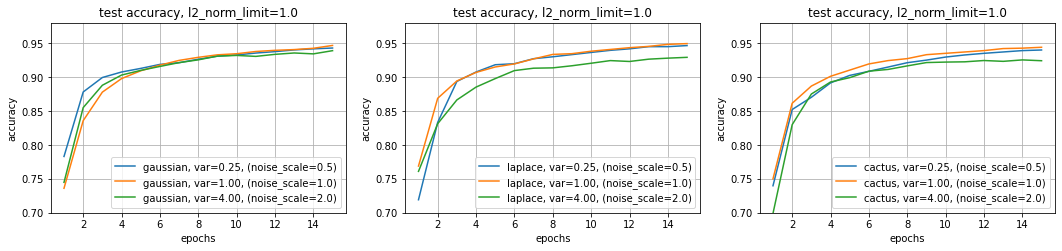

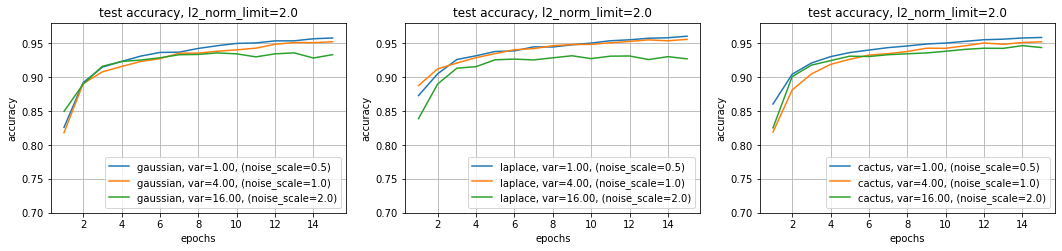

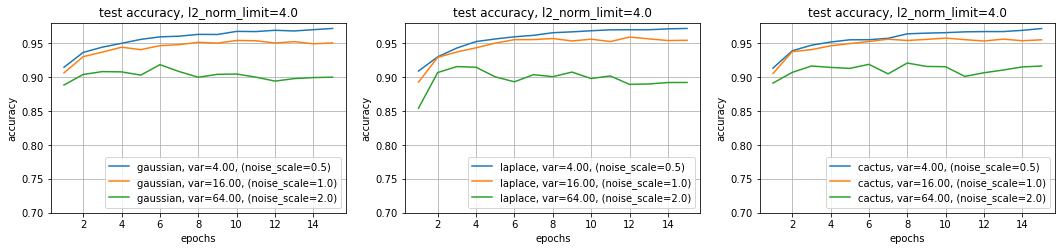

In [43]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

sen=1.0
epochs=15

x=range(1,epochs+1)

dpsgd=['gaussian', 'laplace','cactus']
noise_multiplier=[0.5, 1.0,2.0]
sen=[1.0, 2.0, 4.0]

for sen_type in range(len(sen)):
    plt.figure(figsize=(18, 3.5))
    
    for dpsgd_type in range(len(dpsgd)):
        plt.subplot(1,len(dpsgd),dpsgd_type+1)
        
        for noise_type in range(len(noise_multiplier)):
            variance=(noise_multiplier[noise_type]*sen[sen_type])**2
            filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,dpsgd_type,sen[sen_type], variance))
            curve = pd.read_csv(filename)
            plt.plot(x,curve['val_accuracy'],label=('%s, var=%1.2f, (noise_scale=%1.1f)' 
                                                    %(dpsgd[dpsgd_type], variance, noise_multiplier[noise_type])))       
        plt.title('test accuracy, l2_norm_limit=%1.1f' %(sen[sen_type]))
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.gca().set_ylim([0.7, 0.98])
        plt.legend(loc='lower right')
        plt.grid(True)

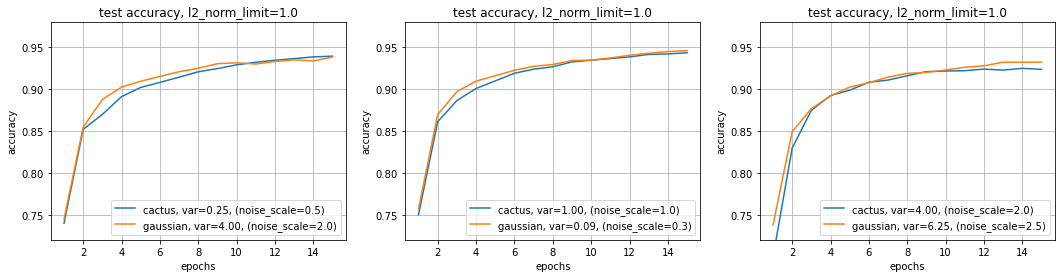

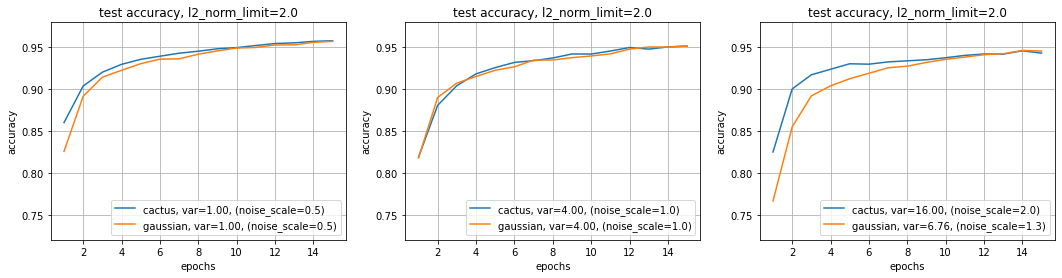

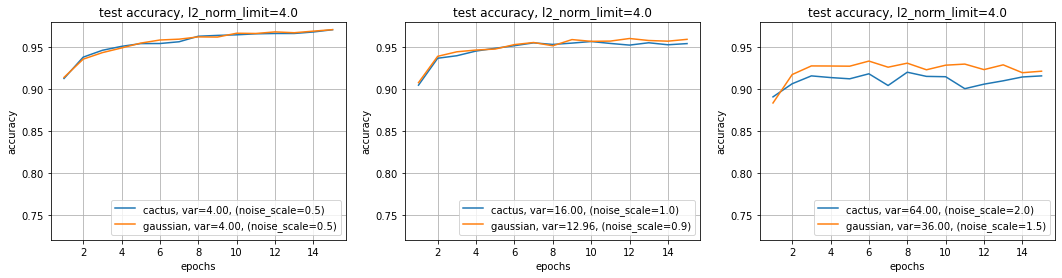

In [3]:
# summarize history for accuracy

import matplotlib.pyplot as plt
import csv
import pandas as pd

sen=1.0
epochs=15
x=range(1,epochs+1)

dpsgd=['gaussian', 'laplace','cactus']
sen=[1.0, 2.0, 4.0]

figx=18
figy=4

def plot_c(dpsgd_type, sen_type, noise_multiplier):
    variance=(noise_multiplier*sen[sen_type])**2
    filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,dpsgd_type,sen[sen_type], variance))
    curve = pd.read_csv(filename)
    plt.plot(x,curve['val_accuracy'],label=('%s, var=%1.2f, (noise_scale=%1.1f)' 
                                                        %(dpsgd[dpsgd_type], variance, noise_multiplier)))
    plt.gca().set_ylim([0.72, 0.98])
    
def subplot_c(dpsgd_type1,noise1, dpsgd_type2, noise2,sen_type):
    plot_c(dpsgd_type1, sen_type, noise1)
    plot_c(dpsgd_type2, sen_type, noise2)
    plt.title('test accuracy, l2_norm_limit=%1.1f' %(sen[sen_type]))
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(loc='lower right')
    plt.grid(True)  

plt.figure(figsize=(figx,figy))
sen_type=0

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=2.0, sen_type=sen_type)
     
plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=0.3, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=2.5, sen_type=sen_type)


plt.figure(figsize=(figx,figy))
sen_type=1

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=0.5, sen_type=sen_type)     

plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=1, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=1.3, sen_type=sen_type)


plt.figure(figsize=(figx,figy))
sen_type=2

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=0.5, sen_type=sen_type)  

plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=0.9, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=1.5, sen_type=sen_type)


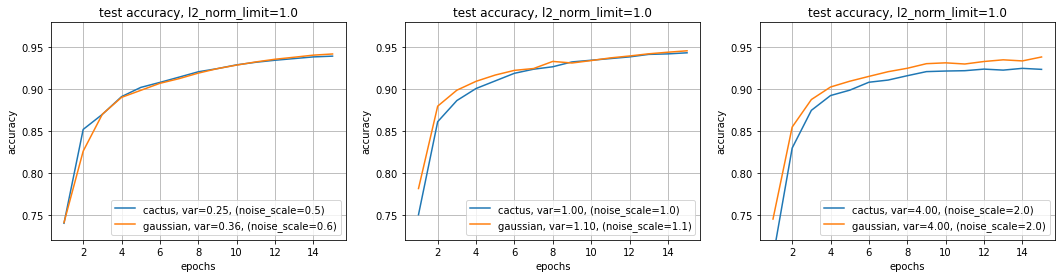

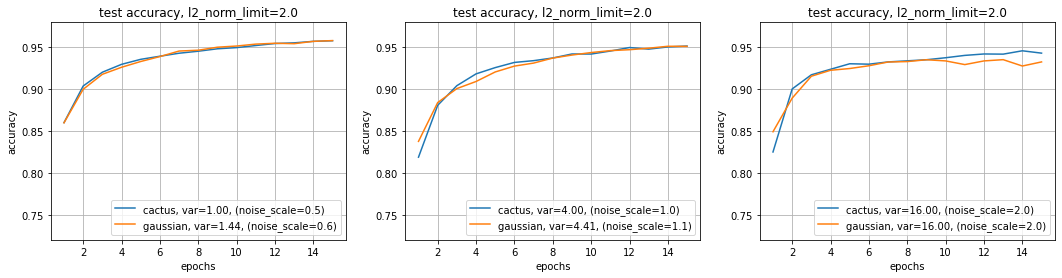

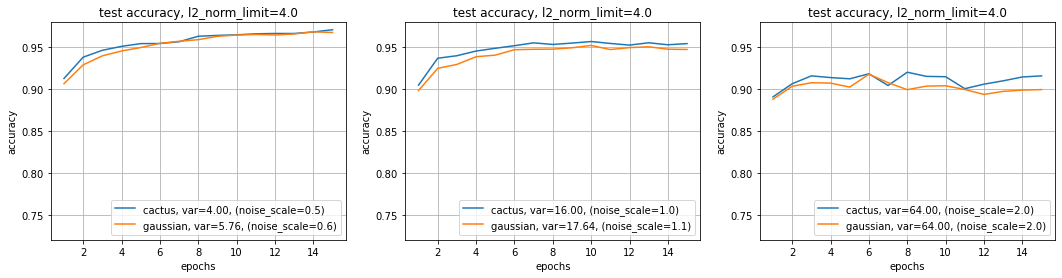

In [5]:
# summarize history for accuracy

import matplotlib.pyplot as plt
import csv
import pandas as pd

sen=1.0
epochs=15
x=range(1,epochs+1)

dpsgd=['gaussian', 'laplace','cactus']
sen=[1.0, 2.0, 4.0]

figx=18
figy=4

def plot_c(dpsgd_type, sen_type, noise_multiplier):
    variance=(noise_multiplier*sen[sen_type])**2
    filename= ('privacy_data/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,dpsgd_type,sen[sen_type], variance))
    curve = pd.read_csv(filename)
    plt.plot(x,curve['val_accuracy'],label=('%s, var=%1.2f, (noise_scale=%1.1f)' 
                                                        %(dpsgd[dpsgd_type], variance, noise_multiplier)))
    plt.gca().set_ylim([0.72, 0.98])
    
def subplot_c(dpsgd_type1,noise1, dpsgd_type2, noise2,sen_type):
    plot_c(dpsgd_type1, sen_type, noise1)
    plot_c(dpsgd_type2, sen_type, noise2)
    plt.title('test accuracy, l2_norm_limit=%1.1f' %(sen[sen_type]))
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(loc='lower right')
    plt.grid(True)  

plt.figure(figsize=(figx,figy))
sen_type=0

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=0.6, sen_type=sen_type)
     
plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=1.05, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=2, sen_type=sen_type)


plt.figure(figsize=(figx,figy))
sen_type=1

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=0.6, sen_type=sen_type)     

plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=1.05, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=2, sen_type=sen_type)


plt.figure(figsize=(figx,figy))
sen_type=2

plt.subplot(1,3,1)
subplot_c(dpsgd_type1=2,noise1=0.5, dpsgd_type2=0, noise2=0.6, sen_type=sen_type)  

plt.subplot(1,3,2)
subplot_c(dpsgd_type1=2,noise1=1, dpsgd_type2=0, noise2=1.05, sen_type=sen_type)

plt.subplot(1,3,3)
subplot_c(dpsgd_type1=2,noise1=2, dpsgd_type2=0, noise2=2, sen_type=sen_type)

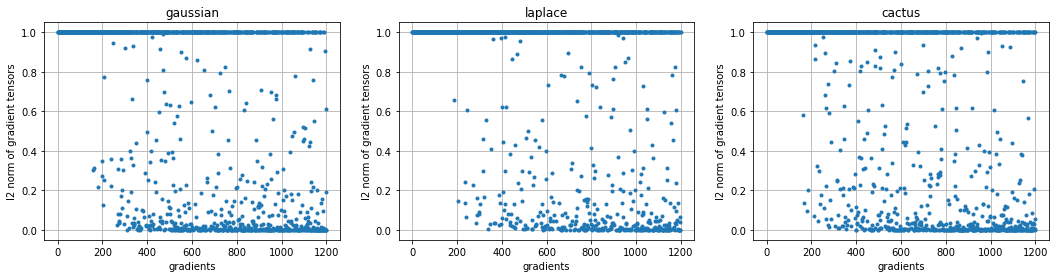

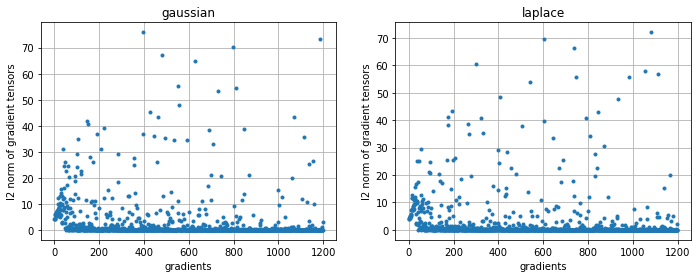

In [29]:
import numpy as np
import matplotlib.pyplot as plt

var=0.25

dpsgd=['gaussian', 'laplace', 'cactus']
# plt.figure(1)
# for dpsgd_type in range(1):
#     filename = ('test_data/norm_%d_v%1.2f_noise.npy' %(dpsgd_type, var))
#     y=np.square(np.load(filename))
#     plt.plot(range(np.size(y)),y,'.',label=dpsgd[dpsgd_type])
# plt.legend(loc='upper right')
# plt.xlabel('noises')
# plt.ylabel('mean of norm^2')

plt.figure(figsize=(18, 4))
for dpsgd_type in range(3):
    plt.subplot(1,3,dpsgd_type+1)
    filename = ('privacy_data/norm_%d_v%1.2f_gradient.npy' %(dpsgd_type, var))
    y=np.load(filename)
    plt.plot(range(np.size(y)),y,'.',label=('%s' %dpsgd[dpsgd_type]))  
    plt.title('%s' %dpsgd[dpsgd_type])
    plt.xlabel('gradients')
    plt.ylabel('l2 norm of gradient tensors')
    plt.grid(True)
    
    
plt.figure(figsize=(18, 4))
for dpsgd_type in range(2):
    plt.subplot(1,3,dpsgd_type+1)
    filename = ('privacy_data/norm_%d_v%1.2f_gradient_nc.npy' %(dpsgd_type, var))
    y=np.load(filename)
    plt.plot(range(np.size(y)),y,'.',label=('%s' %dpsgd[dpsgd_type]))  
    plt.title('%s' %dpsgd[dpsgd_type])
    plt.xlabel('gradients')
    plt.ylabel('l2 norm of gradient tensors')
    plt.grid(True)

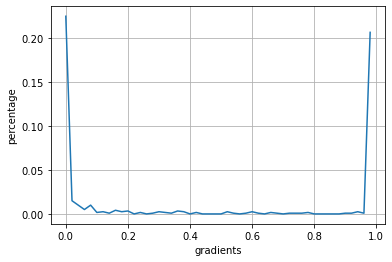

In [10]:
import numpy as np
import matplotlib.pyplot as plt

var=0.25

ql=50
xmax=1
x=np.arange(int(xmax*ql))/ql

dpsgd=['gaussian', 'laplace', 'cactus']
# plt.figure(1)
# for dpsgd_type in range(3):
#     filename = ('test_data/norm_%d_v%1.2f_noise.npy' %(dpsgd_type, var))
#     y=np.square(np.load(filename))
#     pdf=np.zeros(int(xmax*ql))
#     for sample in y:
#         if 0<sample and sample<xmax:
#             pdf[int((sample)*ql)]+=1
#     plt.plot(x, pdf/np.size(y), label=dpsgd[dpsgd_type])    
# plt.xlabel('noise')
# plt.ylabel('percentage')
# plt.grid(True)
# plt.title('Distribution of norm^2, var=%1.2f' %var)
# plt.legend(loc='upper right')

plt.figure(figsize=(8,5))
filename = ('privacy_data/norm_%d_v%1.2f_gradient.npy' %(dpsgd_type, var))
y=np.square(np.load(filename))
pdf=np.zeros(int(xmax*ql))
for sample in y:
    if 0<sample and sample<xmax:
        pdf[int((sample)*ql)]+=1   
plt.plot(x, pdf/np.size(y))   
plt.xlabel('gradients')
plt.ylabel('percentage')
plt.grid(True)

subsampling rate is 0.01
sigma is 4.0
delta = 1e-05


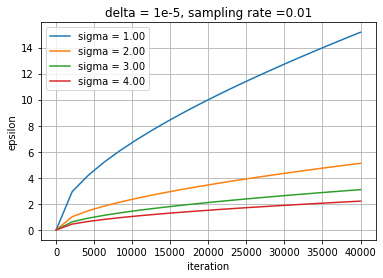

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

batch_size=600
NUM_TRAIN_EXAMPLES=60000
sampling_probability = batch_size / NUM_TRAIN_EXAMPLES
print("subsampling rate is",sampling_probability)

delta = 1e-5
print("delta =",delta)

def compute_epsilon(steps, noise_multiplier):
  """Computes epsilon value for given hyperparameters."""
  if noise_multiplier == 0.0:
    return float('inf')
  orders = [1 + x / 10. for x in range(1, 100)] + list(range(12, 64))  
  rdp = compute_rdp(q=sampling_probability,
                    noise_multiplier=noise_multiplier,
                    steps=steps,
                    orders=orders)
  # Delta is set to 1e-5 because MNIST has 60000 training points.
  return get_privacy_spent(orders, rdp, target_delta=delta)[0]


iter_grid = np.linspace(0,4e4,20)
sigma_grid=[1.0,2.0,3.0,4.0]
eps_grid=[]
for i in range(len(sigma_grid)):
  temp=[]
  for iteration in iter_grid:
      eps = compute_epsilon(iteration, sigma_grid[i])
      temp.append(eps)
  eps_grid.append(temp)

      
plt.figure(figsize=(8,5))
for i in range(len(sigma_grid)):
  plt.plot(iter_grid, eps_grid[i],label = ("sigma = %.2f" %(sigma_grid[i])))
plt.xlabel("iteration")
plt.ylabel("epsilon")
plt.title("delta = 1e-5, sampling rate =%.2f" %(sampling_probability))
plt.legend(loc='best')
plt.grid()